# **Exploratory Data Analysis-Terrorism**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
df=pd.read_csv("/content/globalterrorism.csv",encoding="latin-1")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [ ]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [ ]:
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [ ]:
df.head(3)

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN


In [ ]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

The dataset contains 102641 rows and 18 columns


In [ ]:
df.isnull().sum()

Year              0
Month             0
day               0
Country           0
State           419
Region            0
City            421
latitude       4055
longitude      4056
Attacktype        1
kill           6514
Wound          9853
target1         617
summary       66130
Group             1
Targettype        1
Weapon            1
motive        66680
dtype: int64

In [ ]:
df.Wound=df.Wound.fillna(0)
df.kill=df.kill.fillna(0)

In [ ]:
df.isnull().sum()

Year              0
Month             0
day               0
Country           0
State           419
Region            0
City            421
latitude       4055
longitude      4056
Attacktype        1
kill              0
Wound             0
target1         617
summary       66130
Group             1
Targettype        1
Weapon            1
motive        66680
dtype: int64

In [ ]:
df["Casualities"]=df["Wound"]+df["kill"]


In [ ]:
df.describe()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,102641.00000,102641.000000,102641.000000,98586.000000,9.858500e+04,102641.000000,102641.000000,102641.000000
mean,1993.50585,6.409388,15.318596,21.235255,-8.654997e+02,2.201265,2.961828,5.163093
std,10.83589,3.372091,8.819594,21.729630,2.744927e+05,11.269727,44.468652,51.582250
min,1970.00000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1985.00000,4.000000,8.000000,7.160566,-7.187514e+01,0.000000,0.000000,0.000000
50%,1992.00000,6.000000,15.000000,27.173588,2.376273e+01,0.000000,0.000000,1.000000
75%,2004.00000,9.000000,23.000000,36.354145,6.574223e+01,1.000000,1.000000,3.000000
max,2011.00000,12.000000,31.000000,74.633553,1.793667e+02,1384.000000,8191.000000,9574.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102641 entries, 0 to 102640
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         102641 non-null  int64  
 1   Month        102641 non-null  int64  
 2   day          102641 non-null  int64  
 3   Country      102641 non-null  object 
 4   State        102222 non-null  object 
 5   Region       102641 non-null  object 
 6   City         102220 non-null  object 
 7   latitude     98586 non-null   float64
 8   longitude    98585 non-null   float64
 9   Attacktype   102640 non-null  object 
 10  kill         102641 non-null  float64
 11  Wound        102641 non-null  float64
 12  target1      102024 non-null  object 
 13  summary      36511 non-null   object 
 14  Group        102640 non-null  object 
 15  Targettype   102640 non-null  object 
 16  Weapon       102640 non-null  object 
 17  motive       35961 non-null   object 
 18  Casualities  102641 non-

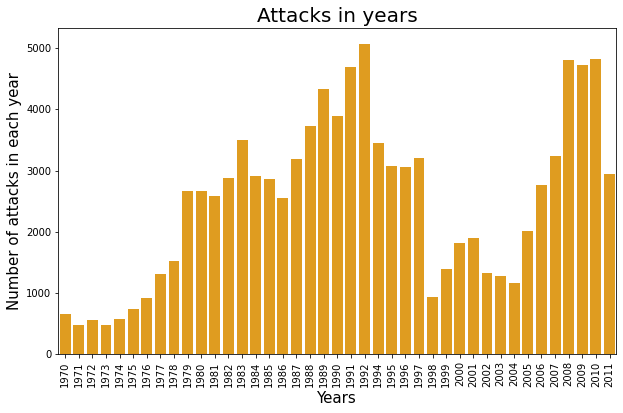

In [ ]:
year=df['Year'].unique()
years_count=df['Year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=year,y=years_count,data=df,color='orange')
plt.title("Attacks in years",fontsize=20)
plt.xlabel("Years",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Number of attacks in each year",fontsize=15)
plt.show()

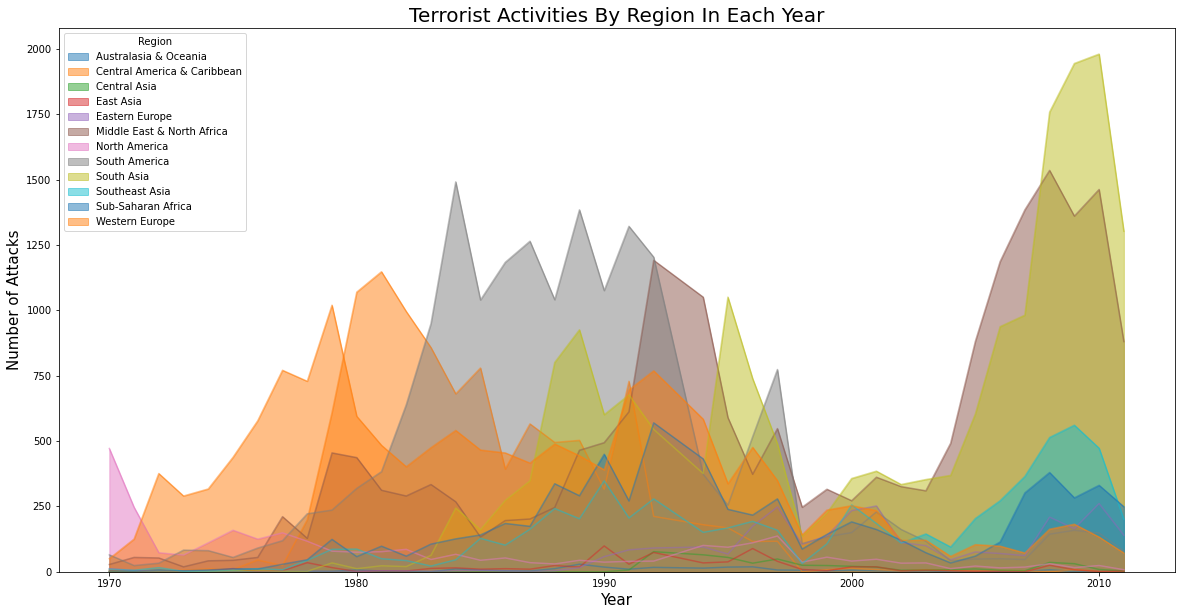

In [ ]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xlabel("Year",fontsize=15)
plt.show()

In [ ]:
Country_attack=df["Country"].value_counts()[:10]
Country_attack

Colombia          7428
Iraq              7237
India             6705
Peru              6047
El Salvador       5320
Pakistan          5158
United Kingdom    4594
Philippines       3302
Spain             3231
Sri Lanka         2935
Name: Country, dtype: int64

In [ ]:
df.Group.value_counts()[1:10]

Shining Path (SL)                                   4519
Farabundo Marti National Liberation Front (FMLN)    3351
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2026
Basque Fatherland and Freedom (ETA)                 2024
Liberation Tigers of Tamil Eelam (LTTE)             1606
Taliban                                             1543
Communist Party of India - Maoist (CPI-Maoist)      1332
New People's Army (NPA)                             1320
Name: Group, dtype: int64

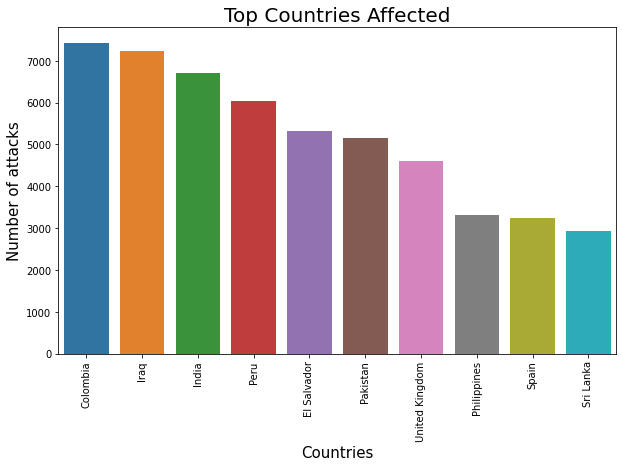

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.Country.value_counts()[:10].index,y=df.Country.value_counts()[:10])
plt.title("Top Countries Affected",fontsize=20)
plt.xlabel("Countries",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Number of attacks",fontsize=15)
plt.show()

<Figure size 864x432 with 0 Axes>

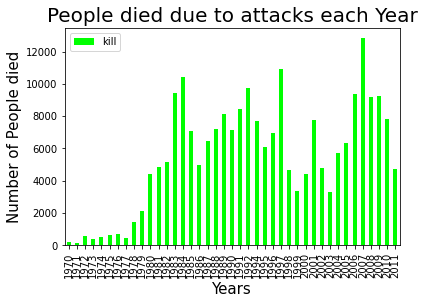

In [ ]:
new_df=df[["Year","kill"]].groupby(["Year"]).sum()
plt.figure(figsize=(12,6))
new_df.plot(kind='bar',color='lime')
plt.title("People died due to attacks each Year",fontsize=20)
plt.xlabel("Years",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Number of People died",fontsize=15)
plt.show()

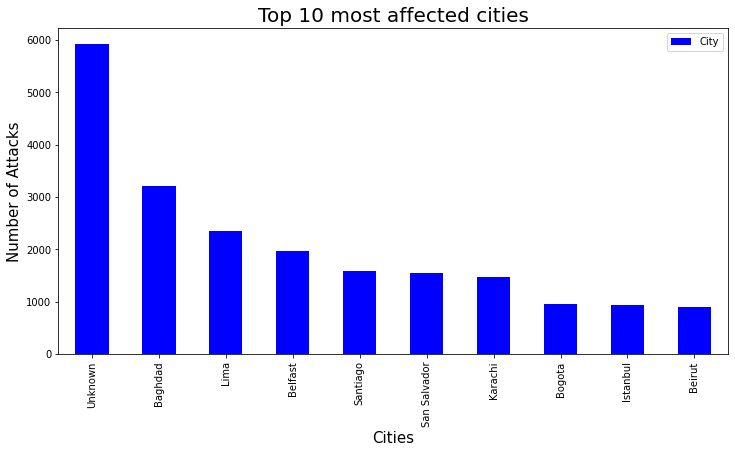

In [ ]:
city_attack=df.City.value_counts().to_frame().sort_values("City",axis=0,ascending=False)[:10]
city_attack.plot(kind='bar',color='blue',figsize=(12,6))
plt.title("Top 10 most affected cities",fontsize=20)
plt.xlabel("Cities",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

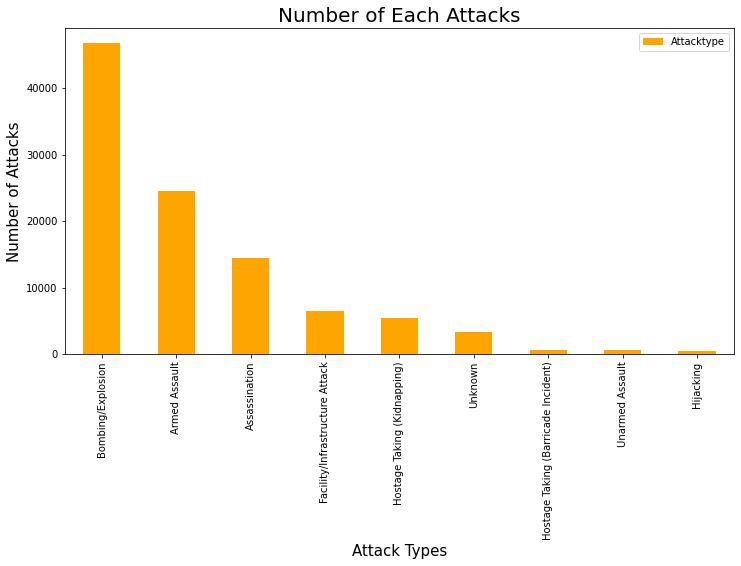

In [50]:
df["Attacktype"].value_counts().to_frame().sort_values("Attacktype",axis=0,ascending=False).plot(kind="bar",figsize=(12,6),color='orange')
plt.title("Number of Each Attacks",fontsize=20)
plt.xlabel("Attack Types",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

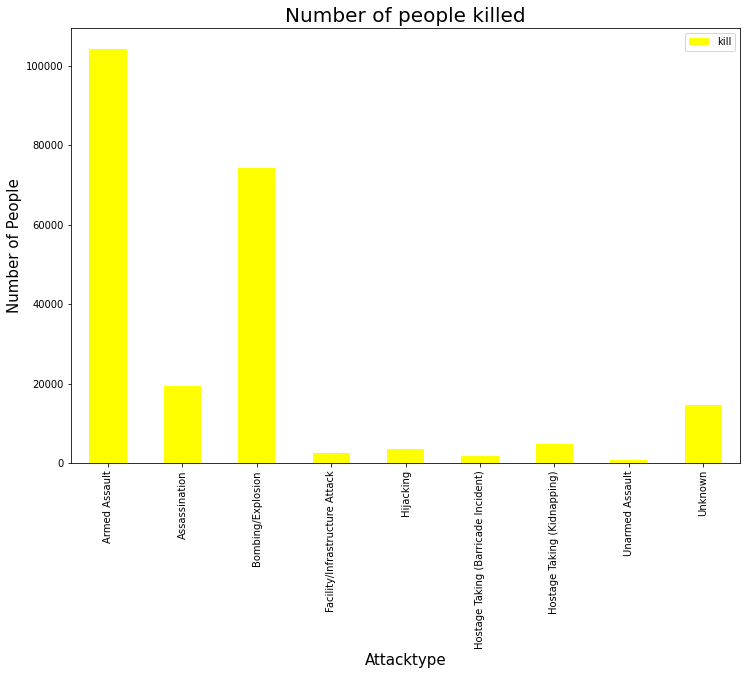

In [ ]:
df[["Attacktype","kill"]].groupby(['Attacktype']).sum().plot(kind='bar',figsize=(12,8),color='yellow')
plt.title("Number of people killed",fontsize=20)
plt.xlabel("Attacktype",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Number of People",fontsize=15)
plt.show()

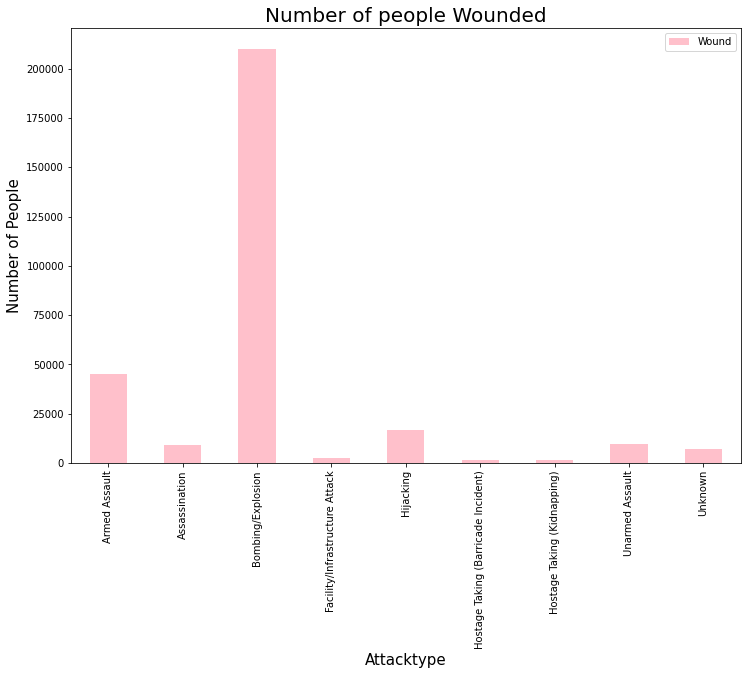

In [ ]:
df[["Attacktype","Wound"]].groupby(['Attacktype']).sum().plot(kind='bar',figsize=(12,8),color='pink')
plt.title("Number of people Wounded",fontsize=20)
plt.xlabel("Attacktype",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Number of People",fontsize=15)
plt.show()

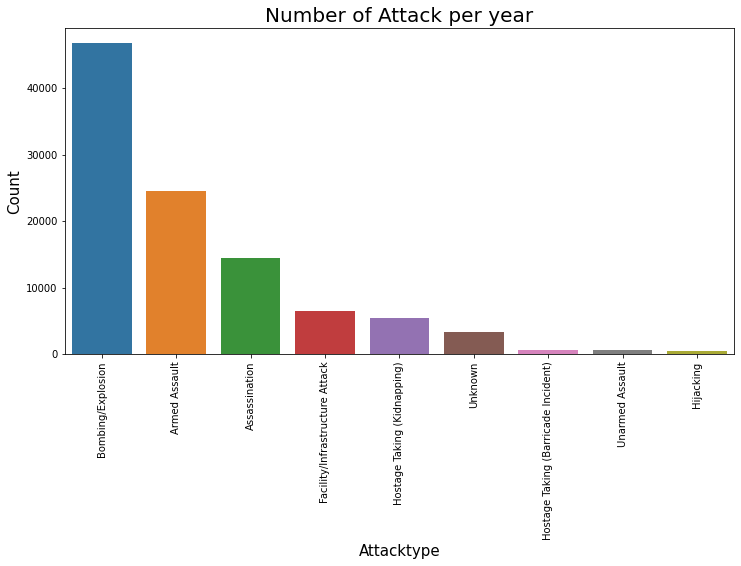

In [ ]:
plt.subplots(figsize=(12,6))
sns.countplot(df["Attacktype"],order=df["Attacktype"].value_counts().index)
plt.title("Number of Attack per year",fontsize=20)
plt.xlabel("Attacktype",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=15)
plt.show()

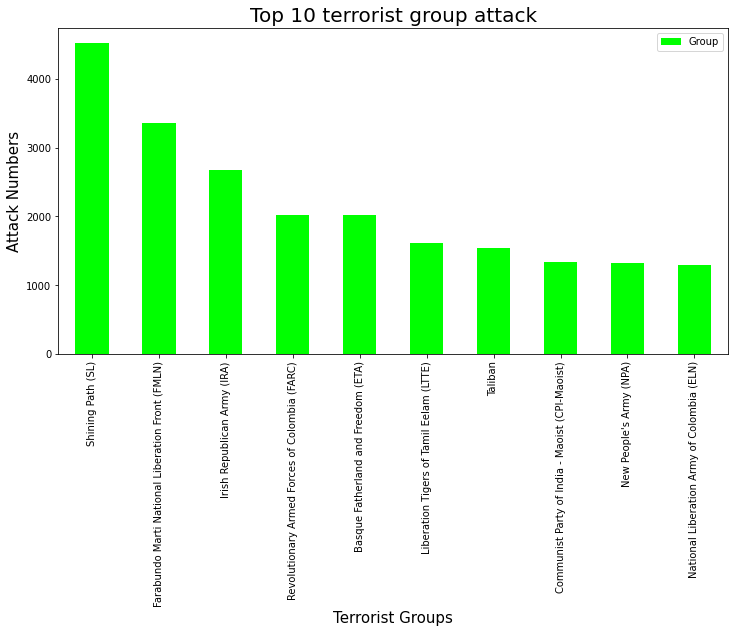

In [ ]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='lime',figsize=(12,6))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("Terrorist Groups",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Attack Numbers",fontsize=15)
plt.show()

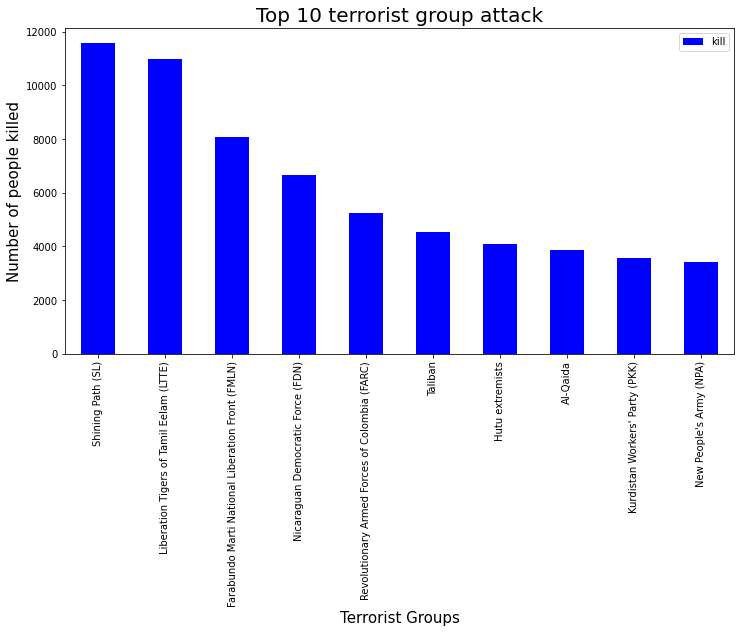

In [ ]:
df[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',color='blue',figsize=(12,6))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("Terrorist Groups",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Number of people killed",fontsize=15)
plt.show()

In [ ]:
new_df=df[['Group','Country','kill']]
new_df=new_df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
new_df

,Group,Country,kill
0,Shining Path (SL),Peru,11564.0
1,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
2,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
3,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
4,Revolutionary Armed Forces of Colombia (FARC),Colombia,5226.0
5,Taliban,Afghanistan,4484.0
6,Kurdistan Workers' Party (PKK),Turkey,3484.0
7,New People's Army (NPA),Philippines,3428.0
8,Al-Qaida,United States,3001.0
9,Al-Qaida in Iraq,Iraq,2817.0


In [ ]:
kill = df.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 225940


In [ ]:
typeKill = df.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,104254.0,19390.0,74222.0,2567.0,3571.0,1803.0,4862.0,691.0,14580.0


In [ ]:
countryKill = df.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,7543.0,41.0,10853.0,0.0,3036.0,0.0,490.0,31.0,13.0,28.0,...,1.0,0.0,1144.0,97.0,1.0,913.0,119.0,324.0,70.0,153.0


# **Conclusion and Results :**

Country with the most attacks: Iraq

City with the most attacks: Baghdad

Region with the most attacks: Middle East & North Africa

Year with the most attacks: 2014

Month with the most attacks: 5

Group with the most attacks: Taliban

Most Attack Types: Bombing/Explosion

Thank You!